In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


## Explorations sur un dataset représentatif de l'ensemble du jeu de donnée 

On teste nos données sur un plus petit jeu de données pour une question de difficulté à gérer le traitement d'un grand volume de donnée (environ 4go). Voici le code qui nous a servi pour générer notre nouveau dataset.

In [18]:
# a=[]
# for i in range(2018, 2024):
#   df = pd.read_csv('original_data/state_TX_'+str(i)+'.csv')
#   sampled_df = df.sample(frac=0.20, random_state=42)
#   a.append(sampled_df)
# final_df=pd.concat(a)
# final_df.to_csv('small_dataset_20.csv')

In [19]:
df = pd.read_csv('small_dataset_20.csv')
print(f' the shape of the dataset is : {df.shape}')
df.head()

 the shape of the dataset is : (1776131, 99)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,5493004RLLKTQS8K7U51,19124,TX,48121.0,4.812102e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3674,22.02,77200,148.0,1180,1317,20
1,2018,OSTXQZDK5VDIPSIEIC53,23104,TX,48367.0,4.836714e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,8144,13.48,75000,183.0,2316,2689,14
2,2018,549300CB67L6KPJLHE19,46340,TX,48423.0,4.842300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,...,9.0,NaN,NaN,5238,24.91,64000,104.0,1657,2295,31
3,2018,549300LYRWPSYPK6S325,23104,TX,48439.0,4.843911e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5243,14.74,75000,177.0,1659,1930,28
4,2018,549300GKFNPRWNS0GF29,12420,TX,48453.0,4.845300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2264,37.59,86000,56.0,142,334,32


Pour une meilleure visibilité des différentes races, on renomme les différentes catégories

In [20]:
def rename_race_data(df):
    new_df = df.copy()
    new_df['derived_race'] = df['derived_race'].replace({
        'American Indian or Alaska Native' : "American Indian",
        'Black or African American': 'African American',
        '2 or more minority races' : "Others",
        'Native Hawaiian or Other Pacific Islander': 'Others',
        'Joint': 'Race Not Available',
        'Free Form Text Only': 'Race Not Available'  
    })
    return new_df

df = rename_race_data(df)

In [21]:
# Calculate the distribution of race
race_counts = df.groupby('derived_race')["derived_race"].count()
# Calculate the distribution of races according to approved loans
approved_counts = df[df['action_taken'] == 1]['derived_race'].value_counts()

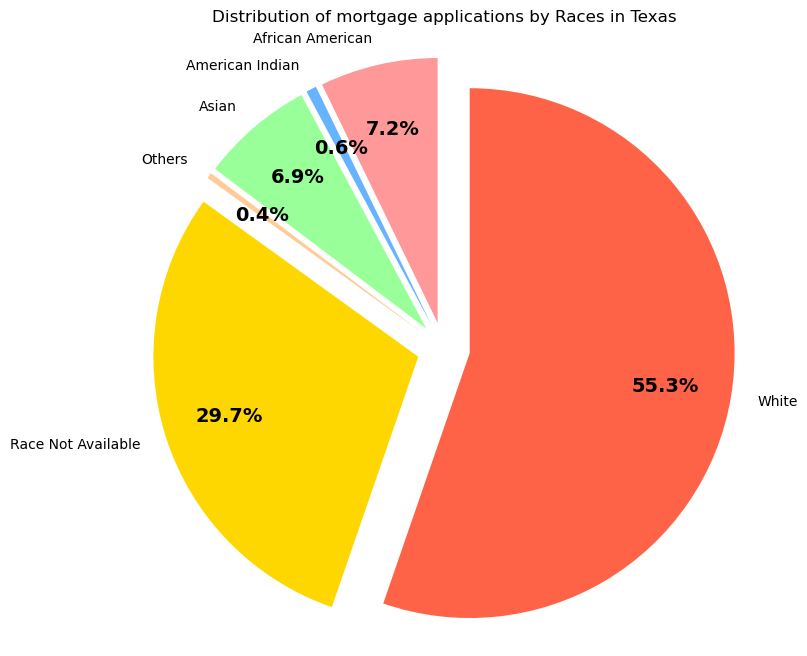

In [22]:
def create_pie_chart(race_counts, title):
    plt.figure(figsize=(8, 8))
    
    colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#8A2BE2'] 
    explode = [0.1] * len(race_counts) 
    
    wedges, texts, autotexts = plt.pie(
        race_counts,
        labels=race_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(race_counts)],  
        pctdistance=0.75,  
        labeldistance=1.1  
    )
    
    for text in autotexts:
        text.set_fontsize(14)
        text.set_color('black')  
        text.set_weight('bold')  
    
    plt.title(title)
    plt.axis('equal') 
    plt.show()

create_pie_chart(race_counts, title=f'Distribution of mortgage applications by Races in Texas')


Ce graphique représente la distribution des données selon la race. Les demandeurs sont majoritairement blancs avec une part de 55% des données. Les asiatiques et les afro-américains ont des pourcentages équivalents (7.2% et 6.9% respectivement), tandis que les autres races comme les amérindiens et les haïtiens représentent une très petite minorité dans notre dataset (moins de 1%).
Il est à noter que 29.7% des données qu’on possède ne mentionne aucune race, mais on estime qu’on a suffisamment de données (environ 6 millions de données).


In [23]:
def create_table_count(race_counts, coefficient):
    
    race_counts_df = race_counts.reset_index(name='Count')
    race_counts_df.columns = ['Race', 'Count']
    race_counts_df['Count'] = race_counts_df['Count'] * coefficient
    
    total_count = race_counts_df['Count'].sum() 
    race_counts_df['Percentage'] = round((race_counts_df['Count'] / total_count) * 100,2)
    race_counts_df['Percentage'] = race_counts_df['Percentage'].astype(str) + '%'


    print(tabulate(race_counts_df, headers='keys', tablefmt='fancy_grid'))
    pass

create_table_count(race_counts, coefficient=5)

╒════╤════════════════════╤═════════╤══════════════╕
│    │ Race               │   Count │ Percentage   │
╞════╪════════════════════╪═════════╪══════════════╡
│  0 │ African American   │  638215 │ 7.19%        │
├────┼────────────────────┼─────────┼──────────────┤
│  1 │ American Indian    │   56540 │ 0.64%        │
├────┼────────────────────┼─────────┼──────────────┤
│  2 │ Asian              │  610360 │ 6.87%        │
├────┼────────────────────┼─────────┼──────────────┤
│  3 │ Others             │   31210 │ 0.35%        │
├────┼────────────────────┼─────────┼──────────────┤
│  4 │ Race Not Available │ 2634065 │ 29.66%       │
├────┼────────────────────┼─────────┼──────────────┤
│  5 │ White              │ 4910265 │ 55.29%       │
╘════╧════════════════════╧═════════╧══════════════╛


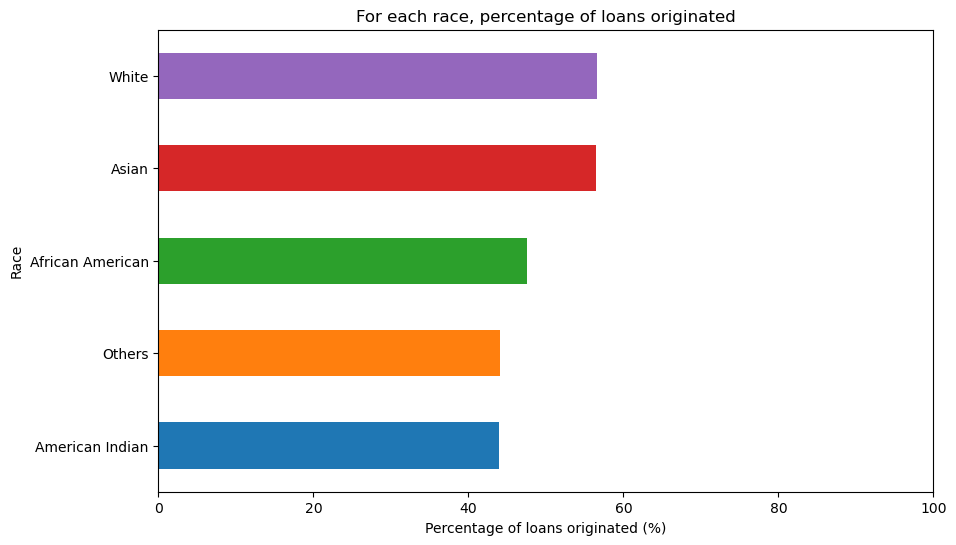

In [26]:
def create_bar_chart_loan_per_race(total_approved_counts, total_race_counts, title='between 2018 and 2023'):
  
  total_approved_counts = total_approved_counts.drop('Race Not Available')
  total_race_counts = total_race_counts.drop('Race Not Available')
  
  percentages = (total_approved_counts / total_race_counts) * 100

  plt.figure(figsize=(10, 6))
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
  percentages.sort_values().plot(kind='barh', color=colors)

  plt.xlabel('Percentage of loans originated (%)')
  plt.ylabel('Race')
  plt.title('For each race, percentage of loans originated')
  plt.xlim(0, 100)

  plt.show()
  pass

create_bar_chart_loan_per_race(approved_counts, race_counts)